In [9]:
import numpy as np
#function for Jacobi method
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence and create error list
        current_error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(current_error)
        
        if current_error < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

#function for Gauss-Seidel method
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence and create error list
        current_error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(current_error)
        if current_error < tol:
            return x_new, k, errors
        x = x_new
    return x, max_iterations, errors

In [10]:
#Set up system of equations to be solved
A = np.array([[3, -.1, -.2],
              [.1, 7, -.3],
              [.3, -.2, 10]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.zeros_like(b)
tolerances = [1e-3, 1e-6, 1e-9]
max_iter = 1000

#Solve using both methods and display iterations needed for different tolerences
for tol in tolerances:
    sol_j, iter_j, _ = jacobi(A, b, x0, tol, max_iter)
    sol_gs, iter_gs, _ = gauss_seidel(A, b, x0, tol, max_iter)
    print(f"Tolerance: {tol}, Jacobi iterations: {iter_j}, Gauss-Seidel iterations {iter_gs}")

Tolerance: 0.001, Jacobi iterations: 3, Gauss-Seidel iterations 3
Tolerance: 1e-06, Jacobi iterations: 6, Gauss-Seidel iterations 4
Tolerance: 1e-09, Jacobi iterations: 8, Gauss-Seidel iterations 6


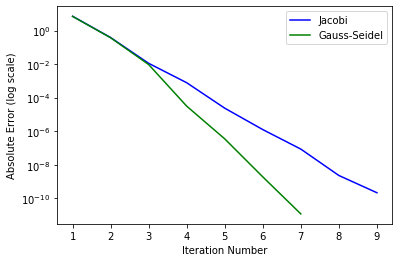

In [21]:
import matplotlib.pyplot as plt
#Find error between iterations for each method
tol = 1e-9
_, _, errors_j = jacobi(A, b, x0, tol, max_iter)
_, _, errors_gs = gauss_seidel(A, b, x0, tol, max_iter)
#graph error
plt.plot(range(1, len(errors_j) + 1), errors_j, 'b-', label='Jacobi')
plt.plot(range(1, len(errors_gs) + 1), errors_gs, 'g-', label='Gauss-Seidel')
plt.yscale('log')
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.show()

In [ ]:
#Discussion
#Gauss-Seidel usually converges in fewer iterations iterations than Jacobi
#As tolerance increases, more iterations are needed for convergence